In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thu nhập dữ liệu

In [2]:
brcc_df = pd.read_csv('data.csv')
brcc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Có bao nhiêu dòng cột? Có dòng nào bị lặp không ?

In [3]:
num_rows = len(brcc_df)
num_cols = len(brcc_df.columns)
print(num_rows , num_cols)

569 33


In [4]:
have_duplicated_rows = brcc_df.duplicated().any()
have_duplicated_rows

False

---

## Khám phá dữ liệu

In [5]:
#with open('description.txt', 'r',encoding='utf-8') as f:
    #print(f.read())

In [6]:
brcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Bởi vì có 569 dòng và 33 cột, các trường đều thể hiện đầy đủ dữ liệu trừ cột cuối cùng "Unamed: 32". 

Hình như cột dữ liệu này pandas lấy nhầm từ tập dữ liệu đã cho, ta sẽ handle cột dữ liệu này trong phần Tiền xử lý dữ liệu.

In [7]:
brcc_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Hầu hết các trường dữ liệu đều là float nên sẽ không có cột nào categorical, tất cả được xem là numerical ngoại trừ hai cột attribute của từng người là ID và Diagnosis.

In [8]:
numerical_cols = list(brcc_df.iloc[:,2:num_cols].columns)
atribute_cols = list(brcc_df.iloc[:,0:2].columns)

### Làm sạch dữ liệu (Data cleaning)

Bởi vì không có dòng trong trường dữ liệu nào là null. Nhưng điều này hơi kì lạ nếu dữ liệu không bị thiếu sót gì, ta cần thực hiện kiểm tra các trường xem tỷ lệ các giá trị bằng 0. Bởi vì đối với các dữ liệu sinh học về cơ thể con người, các giá trị cần được làm rõ.

In [9]:
for col in numerical_cols:
    s = brcc_df[col].value_counts()
    try:
        print(col,s[0])
    except:
        continue

concavity_mean 13
concave points_mean 13
concavity_se 13
concave points_se 13
concavity_worst 13
concave points_worst 13


Như ta có thể thấy, tất cả các trường liên quan đến concavity nếu có giá trị 0 thì các trường còn lại đều có 0. Tiếp theo, ta phải check xem nếu một cột của trường này bằng 0 thì tất cả các cột còn lại có bằng 0 không?

In [10]:
zero_cols = ['concavity_mean','concave points_mean','concavity_se','concave points_se','concavity_worst','concave points_worst']
test_0 = brcc_df[zero_cols]

In [11]:
test_0[test_0['concavity_mean'] == 0]

,concavity_mean,concave points_mean,concavity_se,concave points_se,concavity_worst,concave points_worst
101,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0
314,0.0,0.0,0.0,0.0,0.0,0.0
391,0.0,0.0,0.0,0.0,0.0,0.0
473,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test_0[test_0['concavity_worst'] == 0]

,concavity_mean,concave points_mean,concavity_se,concave points_se,concavity_worst,concave points_worst
101,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0
314,0.0,0.0,0.0,0.0,0.0,0.0
391,0.0,0.0,0.0,0.0,0.0,0.0
473,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,0.0,0.0,0.0,0.0,0.0


Nếu một dòng trong một trường dữ liệu bất kì trong zero_cols đã khai báo bằng 0, tất cả các dòng còn lại ở các trường dữ liệu còn lại đều bằng 0.

Vậy ta sẽ thực hiện làm sạch dữ liệu bằng cách thay thế các giá trị bằng 0 này hoặc bỏ luôn toàn bộ các dòng này.

In [13]:
round(len(brcc_df[brcc_df['concavity_worst'] == 0]) / len(brcc_df) * 100, 2)

2.28

Bởi vì tỷ lệ của các dòng đã nêu chỉ chiếm hơn 2% nên quyết định drop luôn là lựa chọn hợp lý.

In [14]:
brcc_df = brcc_df[brcc_df['concavity_worst'] != 0]

### Tiền xử lý dữ liệu

Các dữ liệu đều là số và cách biệt giữa các giá trị không quá nhiều nên ta không cần chuẩn hóa. Tuy nhiên, khi áp dụng mô hình hồi quy cụ thể là Logistic Regression, ta cần các dữ liệu số và không cần quan tâm đến các giá trị attribute của từng người, cột ID ta có thể drop. Còn cột Diagnosis, ta đổi các giá trị bên trong thành (0,1) để áp dụng các hàm hồi quy khi phân hóa dữ liệu.

Cột Diagnosis có hai giá trị chính là:
- M: malignant(nặng) --> M = 1
- B: bengin(nhẹ)     --> B = 0

Ngoài ra, đã nhắc ở phần Khám phá dữ liệu, ta sẽ drop luôn cột cuối cùng vì có thể cột dữ liệu này pandas lấy nhầm từ tập dữ liệu đã cho.

In [15]:
brcc_df = brcc_df.drop(columns=['id','Unnamed: 32'],axis=1)

In [16]:
brcc_df[atribute_cols[1]] = brcc_df[atribute_cols[1]].replace(to_replace=[['B'],['M']],value=[0,1])

In [17]:
brcc_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


Vẫn còn một vấn đề nữa, vì đề bài yêu cầu khi dự đoán kết quả mô hình, ta phải đưa giá trị đầu vào trước, tức là ta phải điền toàn bộ giá trị cho từng trường dữ liệu trên. Việc này quá dài dòng và tốn thời gian, ta có thể xem xét các mối tương quan thông qua heatmap bằng việc xây dựng một confusion_matrix.

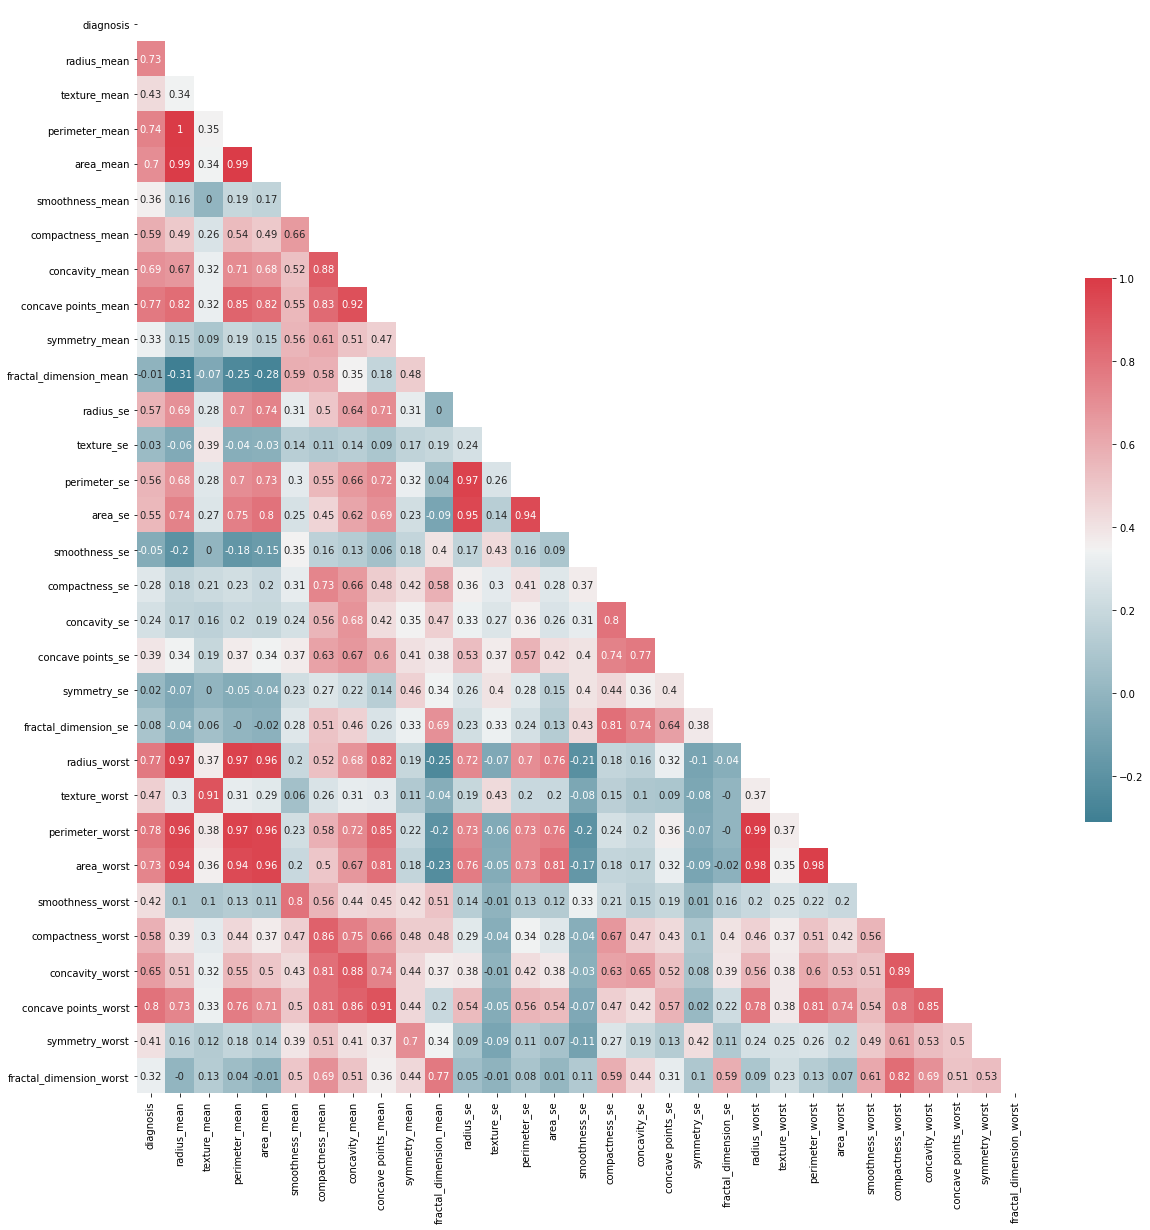

In [18]:
corr = brcc_df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": 0.5}, annot=True)

plt.show()

Thông qua heatmap, ta có thể thấy có những sự tương quan nhất định ở một vài biến với nhau. Ví dụ:
- radius_mean đối với area-mean và perimeter_mean có sự tương quan cao lần lượt là 1 và 0.99 tức hai chỉ số này có liên quan mật thiết đến radius_mean. Bên cạnh đó, area-mean và perimeter_mean cũng có chỉ số tương quan là 0.99. Vậy ta có thể bỏ hai cột area-mean và perimeter_mean.
- Các chỉ số tương quan giữa compactness, concativity và concavepoints như đã nói Data Cleaning cũng có sự liên quan cao, cho nên ta cũng có thể áp dụng cách này để xóa các cột liên quan với nhau.
- Tiếp theo, các chỉ số liên quan se cũng có sự tương quan cao khi radius_es với area-mean và perimeter_mean là 0.95 và 0.97. Tương tự, ta bỏ luôn hai cột này, giữ lại radius_es.
- Cuối cùng, ta có thể dễ dàng nhận ra các ô màu đỏ tập trung các chỉ số worst đối với chỉ số mean. Tức là các trường này cũng có chỉ số tương quan khá cao. Bởi vì các cột như area và perimeter đều theo radius nên điều tương tự sẽ xảy ra với các cột worst. Bên cạnh đó radius_mean và radius_worst cũng tương quan cao nên ta chỉ cần giữ lại radius_mean là được.

Chung quy lại, ta sẽ bỏ các cột liên quan đến perimeter và area(mean và es), các cột worst và cuối cùng là các cột compactness, concavity, và concave points.

In [19]:
removed_cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se'
        ]
brcc_df = brcc_df.drop(removed_cols, axis=1)

In [26]:
brcc_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,0.10990,0.22360,0.2149,0.06879,0.9622,1.0260,0.006399,0.04310,0.02057,0.006213
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


Tiền xử lý dữ liệu đã hoàn thành.

In [21]:
test = (brcc_df.drop('diagnosis',axis=1).iloc[300]).values.reshape(1,-1)
test

array([[1.160e+01, 2.449e+01, 7.474e-02, 5.688e-02, 1.935e-01, 5.878e-02,
        2.512e-01, 1.786e+00, 6.122e-03, 2.337e-02, 3.194e-02, 2.211e-03]])

### Phân tích dữ liệu (Trần Quốc Việt)

## Xây dựng mô hình và dự đoán

Ta sẽ xem xét hai kĩ thuật phân loại tập train và test chính: random và K-Fold Cross_validation. Nếu cái nào có điểm chính xác cao hơn thì lấy cái đó.

### Normal split method

In [22]:
X = brcc_df.drop('diagnosis',axis=1)
y = brcc_df['diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [24]:
predictions = logmodel.predict(X_test)
print("Accuracy Score:",round(accuracy_score(y_test,predictions),3)*100)

NameError: name 'accuracy_score' is not defined

### K-Fold cross-validation method

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [ ]:
X = brcc_df.drop('diagnosis',axis=1).values
y = brcc_df['diagnosis'].values
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)
print("Accuracy Score:",round(accuracy_score(y_test,predictions),3)*100)

Như vậy, nếu chia theo phương pháp K-Fold Cross_validation thì sẽ có tỷ lệ cao hơn một chút.

### Nhập input để dự đoán

In [ ]:
radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se = 0,0,0,0,0,0,0,0,0,0,0,0
radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se = input("Enter: ").split()

input_pre = [radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se] 

In [ ]:
input_pre = [float(x) for x in input_pre]
input_pre = np.array(input_pre).reshape(1, -1)

In [ ]:
input_pre

In [ ]:
prediction = logmodel.predict(input_pre)
prediction.item()

In [ ]:
input("Enter radius_mean:",radius_mean)
input("Enter texture_mean:",texture_mean)
input("Enter smoothness_mean:",smoothness_mean)
input("Enter compactness_mean:",compactness_mean)
input("Enter symmetry_mean:",symmetry_mean)
input("Enter fractal_dimension_mean:",fractal_dimension_mean)
input("Enter radius_se:",radius_se)
input("Enter texture_se:",texture_se)
input("Enter smoothness_se:",smoothness_se)
input("Enter compactness_se:",compactness_se)
input("Enter symmetry_se:",symmetry_se)
input("Enter fractal_dimension_se:",fractal_dimension_se)